In [1]:
library(naturalsort)
library(fields)
library(rasterImage)
library(viridis)

dataDir <- '~/jackgl/lung_1108_1/'
ctype <- 'SCLC'

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-0 (2018-06-19) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 
Loading required package: plotrix

Attaching package: ‘plotrix’

The following object is masked from ‘package:fields’:

    color.scale

Loading required package: viridisLite


## Population size time series

In [2]:
flst <- naturalsort(list.files(dataDir))
flst <- flst[1:(length(flst)-1)]

In [ ]:
Ns <- array(NA,dim=c(length(flst),5e3))
# Pops <- list()
# genes <- list()
# gentimes <- list()
mus <- rep(NA,100)
N0s <- rep(NA,100)

for (ii in 1:length(flst)) {
    load(paste0(dataDir,flst[ii]))
    N[N==0] <- NA
    Ns[ii,] <- N
#     genes <- append(genes,mut_genes)
#     gentimes <- append(gentimes,gen_time)
    mus[ii] <- mu
    N0s[ii] <- N0
    rm(Pop,gen_time,N,mut_genes)
}

In [ ]:
get_fc <- function(N) {
    return(N[length(which(!is.na(N)))]/N[1])
}

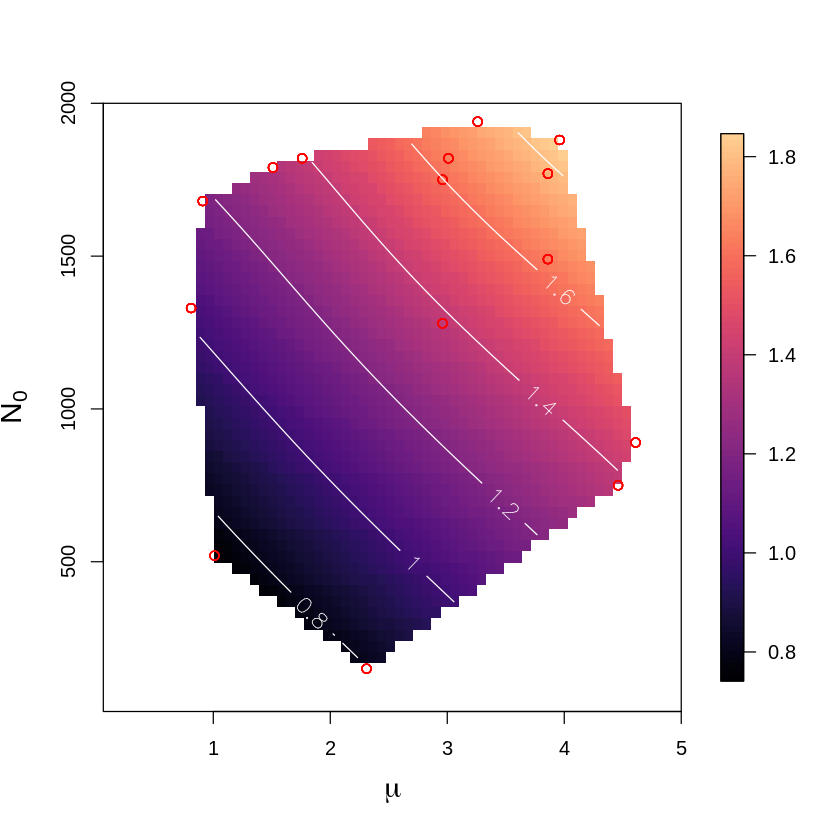

In [7]:
# Assign data to temporary objects
x <- mus
y <- N0s
z <- as.vector(apply(Ns,1,get_fc))

# # Append boundary point data from test_lung_1101
# x <- append(x,c(.05,.05,5,5))
# y <- append(y,c(100,2e3,100,2e3))
# z <- append(z,c(0.95,1.0529,0.744,2.6535))

# Thin plate spline interpolation to irregular data
test.spline <- Tps(data.frame(x,y), z)
new.grid <- predictSurface(test.spline, nx = 50, ny = 50)
cols <- magma(100)
image.plot(new.grid,xlim=c(0.06,5),ylim=c(10,2000),
          col=cols[1:90],
          xlab=expression(mu),
          ylab=expression(N[0]),
          cex.lab=1.5)
points(x,y,pch=1,col='red')
contour(new.grid,add=TRUE,nlevels=7,col='white',labcex=1.2)
